<a href="https://colab.research.google.com/github/siva4iov/FlatsPrice_DS_Proj/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis

In [85]:
import pandas as pd
import numpy as np
import os
from google.colab import files
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


if not os.path.exists("/content/dataset_clean_full.csv"): #cleaned dataset with geocoding
  files.upload()
if not os.path.exists("/content/features_decode.csv"): #explained columns
  files.upload()
if not os.path.exists("kazan.geojson"):# shapefile of Kazan
  files.upload()

## Columns explanation

In [86]:
df = pd.read_csv("dataset_clean_full.csv", sep=";")
features = pd.read_csv("features_decode.csv", sep=";")
display(features)


,name,meaning
0,Appliances_1,утюг
1,Appliances_2,телевизор
2,Appliances_3,водонагреватель
3,Appliances_4,кондиционер
4,Appliances_5,посудомоечная машина
5,Appliances_6,фен
6,Appliances_7,микроволновка
7,Appliances_8,плита
8,Appliances_9,стиральная машина
9,Appliances_10,холодильник


In [87]:
df.head()

,Living_space,Num_of_rooms,Renovation,Price,Total_area,Kitchen_area,Floor,Appliances_1,Appliances_2,Appliances_3,...,longitude,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9
0,20.0,1,1,27000,39.0,12.0,10,0,1,0,...,49.179327,1,0,0,0,0,0,0,0,0
1,NaN,1,1,14000,18.0,NaN,9,0,0,0,...,49.107790,0,1,0,0,0,0,0,0,0
2,NaN,3,2,40000,105.0,25.0,2,0,1,1,...,49.169175,0,0,1,0,0,0,0,0,0
3,13.5,1,2,20000,45.0,17.5,5,0,1,1,...,49.136806,0,0,0,1,0,0,0,0,0
4,24.0,1,2,22000,36.0,6.0,10,0,1,1,...,49.146880,0,0,0,1,0,0,0,0,0


In [88]:
df.columns

Index(['Living_space', 'Num_of_rooms', 'Renovation', 'Price', 'Total_area',
       'Kitchen_area', 'Floor', 'Appliances_1', 'Appliances_2', 'Appliances_3',
       'Appliances_4', 'Appliances_5', 'Appliances_6', 'Appliances_7',
       'Appliances_8', 'Appliances_9', 'Appliances_10', 'Balcony_1',
       'Balcony_2', 'Furniture_1', 'Furniture_2', 'Furniture_3',
       'Internet_tv_1', 'Internet_tv_2', 'Bathroom_1', 'Bathroom_2',
       'Utilities_1', 'Room_type_1', 'Room_type_2', 'Studio', 'Floors_in_b',
       'location', 'coord', 'latitude', 'longitude', 'district_1',
       'district_2', 'district_3', 'district_4', 'district_5', 'district_6',
       'district_7', 'district_8', 'district_9'],
      dtype='object')

In [89]:
sns.set_theme(context='notebook',style="dark")


## Lets start with correlation matrix
This way we can find columns that will be of interest to us

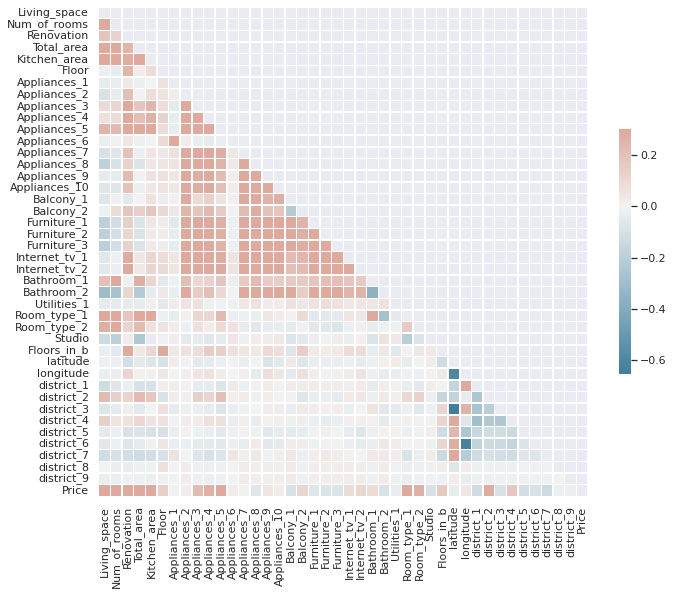

In [90]:

cols = df.columns.tolist()

cols = cols[:3] + cols[4:] + [cols[3]]

corr = df[cols].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

## So what do we see

Big red triangle in center means that columns like `Appliances` and some other amenities of the apartment like `Balcony` or `Furniture` have high correlation. 

It's easy to explain, apartments with amenities rarely have only a microwave or dishwasher only. Usually if there is one, then most likely there is another

## Also we see correlation betwen areas columns and num_of_rooms
it's perfectly logical.

Some big appliances(by size) correlate with area columns, because it needs space to place. It correlates with price too. It looks like such appliances are very much appreciated. 

It turns out that there is a relationship between **Area - (big)Appliances - Price**

## Farther
We see that apartments with high area, most likely will have Bathroom type2(separate bathroom)


## Districts
Looks like the most valuable districts is `2` and `4`. 
From my own experience I say that this is noticeable in living here.


## Let's pay attention to the distribution of prices

Text(0.5, 8.959999999999972, 'Price(thousands rubles)')

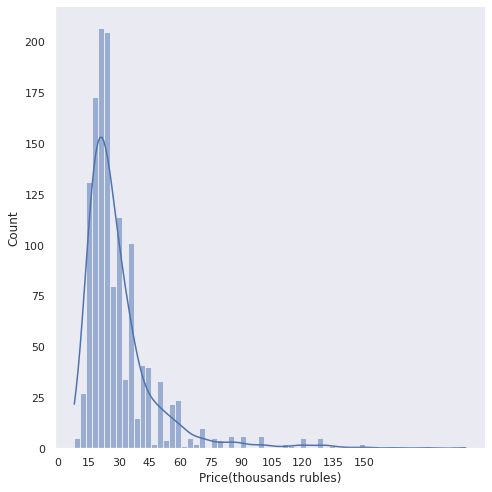

In [91]:
sns.displot(df['Price']/1000, kde=True, height=7)
plt.xticks(np.arange(11)*15)
plt.xlabel("Price(thousands rubles)")

## Distribution is different from normal
*   Relatively few apartments with a price higher than 60(thous.rubles)
*   Mostly budget apartments. I think this is due to the large number of students.



## Let's calculate the coefficients

In [92]:
display(df['Price'].skew())
df["Price"].kurt()

3.377933556310669

16.216259618011456

It tells that there are positive skewness(due to small amount of high rental price apartments) and pretty high kurtosis(due to large amount of budget apartments)

## Let's take a closer look at the relationship between features and target

In [93]:
df.columns

Index(['Living_space', 'Num_of_rooms', 'Renovation', 'Price', 'Total_area',
       'Kitchen_area', 'Floor', 'Appliances_1', 'Appliances_2', 'Appliances_3',
       'Appliances_4', 'Appliances_5', 'Appliances_6', 'Appliances_7',
       'Appliances_8', 'Appliances_9', 'Appliances_10', 'Balcony_1',
       'Balcony_2', 'Furniture_1', 'Furniture_2', 'Furniture_3',
       'Internet_tv_1', 'Internet_tv_2', 'Bathroom_1', 'Bathroom_2',
       'Utilities_1', 'Room_type_1', 'Room_type_2', 'Studio', 'Floors_in_b',
       'location', 'coord', 'latitude', 'longitude', 'district_1',
       'district_2', 'district_3', 'district_4', 'district_5', 'district_6',
       'district_7', 'district_8', 'district_9'],
      dtype='object')

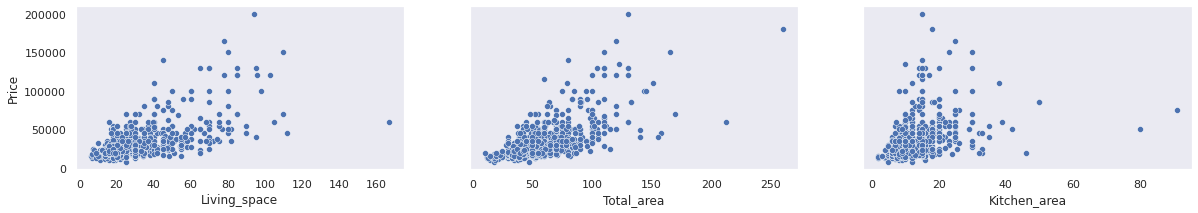

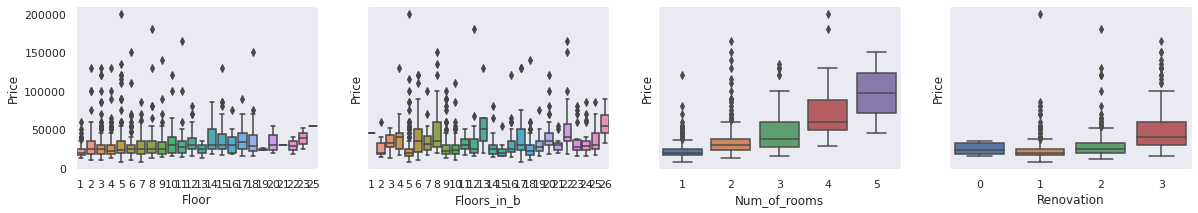

In [74]:
num_cols = ['Living_space', 'Total_area', 'Kitchen_area']
cat_cols = ['Floor', 'Floors_in_b', 'Num_of_rooms', 'Renovation']
fig, axs = plt.subplots(ncols=3, figsize=(20, 3), sharey=True)
fig, axs2 = plt.subplots(ncols=4, figsize=(20, 3), sharey=True)
for col, ax in enumerate(axs.flatten()):
  sns.scatterplot(x=num_cols[col], y='Price', data=df[num_cols + ["Price"]], ax=ax)

for col, ax in enumerate(axs2.flatten()):
  sns.boxplot(x=cat_cols[col], y='Price', data=df[cat_cols + ["Price"]], ax=ax)


## Numueric features 
We can see that there is a linear relationship here, so area is very important to price.

Maybe when we normalize the data it will be better noticeable

## Categorical features 
In `Floor` we see not so many. But for 1st floor usally lower price. This can be explained by the fact that the first floor is usually colder and people passing under the windows can look into the apartment.


After the 10th floor, the price increases slightly. I think that because buildings with more than 10 floors probably not that old.

In `Num_of_rooms` the price increases with the number of rooms.
More rooms mean more area and there can live big family. Also apartments with more than 3 rooms not that often, I think it's very appriciated.

In `Renovation` everything is natural. Better renovation -> higher price

## I think it's worth looking at the distribution in different districts
Some districts are more desirable

District_1 count:  316
District_2 count:  212
District_3 count:  233
District_4 count:  287
District_5 count:  89
District_6 count:  116
District_7 count:  68
District_8 count:  1
District_9 count:  1


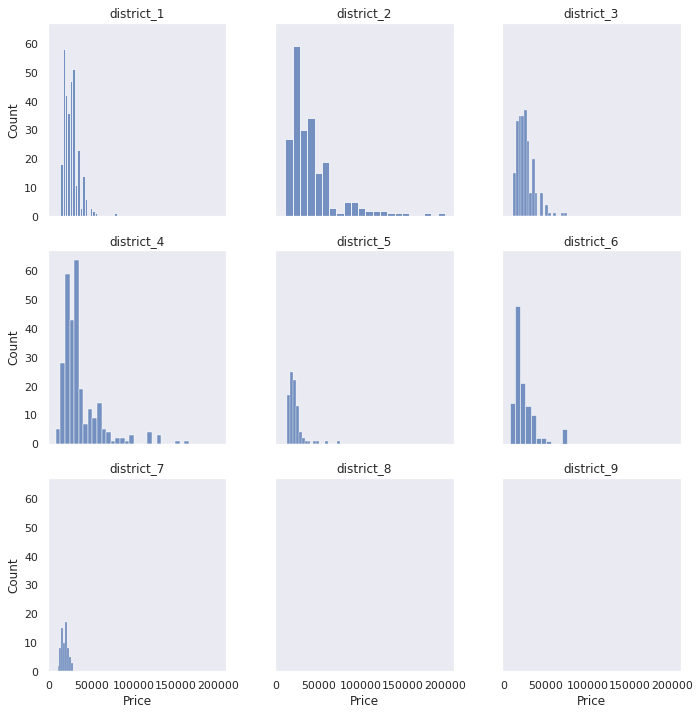

In [75]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(10, 10), sharey=True, sharex=True)

fig.tight_layout(pad=2)

for col, ax in enumerate(axs.flatten()):
  sns.histplot(x='Price', data=df[df[f'district_{col+1}'] == 1], ax=ax)
  ax.set_title(f'district_{col+1}')

for i in range(1, 10):
  print(f'District_{i} count: ', df['district_' + str(i)].sum())

* There are in 2nd and 4th district apartments with higher prices.
* In 1st and 3hd large amount of budget apartments
* In 5,6,7 relatively small amount of apartments to rent
* 8 and 9 are blank, the reason is that there is only 1 notice for each district, i wll drop them to simplify dataset



## I have an idea about role of floor of apartment

I think its important if it is a first floor or a last floor

1st floor apartments mean price:  22820.178571428572
Not 1st and not last floor apartments mean price:  30777.63539823009
Last floor apartments mean price:  29358.109090909093


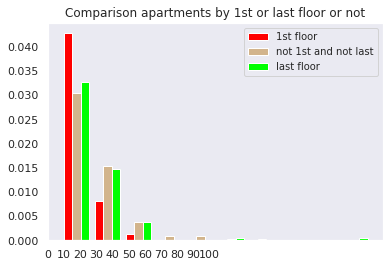

In [105]:
colors = ['red', 'tan', "lime"]
mask = (df["Floor"] != 1) & (df["Floor"] != df["Floors_in_b"])
plt.hist([df[df["Floor"] == 1]["Price"]/1000,
          df[mask]["Price"]/1000,
          df[df["Floor"] == df["Floors_in_b"]]["Price"]/1000
          ],
          density=True, histtype='bar', color=colors,
          label=["1st floor", 'not 1st and not last', "last floor"])
plt.legend(prop={'size': 10})
plt.xticks(10 * np.arange(11))
plt.title('Comparison apartments by 1st or last floor or not')
print("1st floor apartments mean price: ", df[df["Floor"] == 1]["Price"].mean())
print("Not 1st and not last floor apartments mean price: ", df[mask]["Price"].mean())
print("Last floor apartments mean price: ", df[df["Floor"] == df["Floors_in_b"]]["Price"].mean())

It seems like not so important is it a last floor, but apartments on 1st floor cost lower. There are more apartments with low price, and much less with high price.

I'll keep that in mind when I build a model.

## Look at the map

I will use geopandas for opening data from geojson file

In [76]:
!pip install geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
layer = gpd.read_file("kazan.geojson")

## I will plot edges of Kazan
Then i plot apartments on it, and describe them by their price

# Also
I will plot Metro and city center


There are coordinates of metro stations and city_center, I took it from google maps.

In [78]:
metro = [
    [55.74437098345888, 49.21842147085857],
    [55.75005848187576, 49.20874803385248],
    [55.759933872926894, 49.19165479076522],
    [55.765435, 49.165143],
    [55.77690597053148, 49.142589131055516],
    [55.787108350131085, 49.122054609493496],
    [55.7959302953497, 49.1062780870964],
    [55.81666978747769, 49.09852469080619],
    [55.82716721066275, 49.08321529204553]
]
metro = np.array(metro)

city_center = [[55.787602, 49.121079]]
city_center = np.array(city_center)

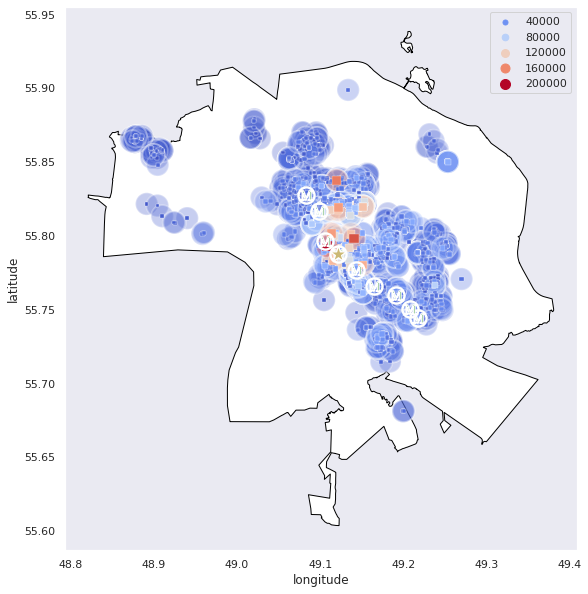

In [79]:
fig, axs = plt.subplots(figsize=(10, 10))
palette = sns.color_palette("coolwarm", as_cmap=True)
layer.plot(ax = axs, color='white', edgecolor='black')

sns.scatterplot("longitude", 'latitude', palette=palette,
                hue="Price", s=500, alpha=0.3, legend=False, data=df.sort_values("Price"))

sns.scatterplot("longitude", 'latitude', palette=palette, hue="Price",
                size="Price", sizes=(10,100), marker='s', data=df.sort_values("Price"))

sns.scatterplot(metro[:, 1], metro[:, 0], marker="$Ⓜ︎$", s=300, color='green')

sns.scatterplot(city_center[:, 1], city_center[:, 0], marker="*", s=300, color='y')

I think this plays an important role in the price of the apartment


I will try to check it using distance calculation to these points

In [80]:
import geopy
from geopy.distance import geodesic as GD

In [81]:
def calc_distances(df: pd.DataFrame) -> pd.DataFrame:
  distances = []
  values = df.loc[:, ["latitude", "longitude"]].values
  min_d = None
  for coords in values:
    for st in metro:
      d = GD(coords, st).km
      if (min_d is None) or d < min_d:
        min_d = d
    cc_d = GD(coords, city_center[0]).km
    distances.append([min_d, cc_d])
    min_d = None
  distances = np.array(distances)
  return pd.DataFrame(distances, columns=["Metro_d", "Center_d"])
distances = calc_distances(df)

In [82]:
dist_df = pd.concat([distances, df["Price"]], axis=1)

corr = dist_df.corr()

corr["Price"]

Metro_d    -0.206599
Center_d   -0.365279
Price       1.000000
Name: Price, dtype: float64

## As we see there is relationsheip

Closer to center -> higher price
Distance to metro also is meaningful. So I will add this features when i will train a model

## Conclusions



*   Large number of appartments with price in range 15-40
*   Area features is the top priority for price
*   Appartments with appliances cost higher
*   Price depends on district where apartment is
*   As expected apartments near the center cost more

